In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../data/gyokeres_stats.csv")

df

,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,90s,...,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
0,2023-2024,25,Sporting CP,pt POR,Primeira Liga,1st,33,32,"2,913",32.4,...,0.90,0.31,1.20,0.74,1.05,0.69,0.24,0.93,0.58,0.82
1,2024-2025,26,Sporting CP,pt POR,Primeira Liga,1st,33,31,"2,804",31.2,...,1.25,0.22,1.48,0.87,1.09,0.99,0.23,1.22,0.69,0.92
2,2025-2026,27,Arsenal,eng ENG,Premier League,1st,18,15,"1,227",13.6,...,0.37,0.00,0.37,0.22,0.22,0.47,0.08,0.55,0.35,0.44


In [7]:
# Sporting 2024-25 season
sporting = df[df['Season'] == '2024-2025'].iloc[0]

# Arsenal 2025-26 season
arsenal = df[df['Season'] == '2025-2026'].iloc[0]

# (using .1 columns for per 90 stats)
print("Sporting 2024-25:")
print(f"Goals/90: {sporting['Gls.1']}")
print(f"npxG/90: {sporting['npxG.1']}")
print(f"Assists/90: {sporting['Ast.1']}")

print("\nArsenal 2025-26:")
print(f"Goals/90: {arsenal['Gls.1']}")
print(f"npxG/90: {arsenal['npxG.1']}")
print(f"Assists/90: {arsenal['Ast.1']}")

Sporting 2024-25:
Goals/90: 1.25
npxG/90: 0.69
Assists/90: 0.22

Arsenal 2025-26:
Goals/90: 0.37
npxG/90: 0.35
Assists/90: 0.0


In [10]:
print(df.columns.tolist())

['Season', 'Age', 'Squad', 'Country', 'Comp', 'LgRank', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1']


In [12]:
games_played_ratio = arsenal['90s'] / sporting['90s']  # Arsenal / Sporting
goals_ratio = arsenal['Gls'] / sporting['Gls']

print(f"Games played: {games_played_ratio:.1%} (almost half)")
print(f"Goals scored: {goals_ratio:.1%} (just 1/8th!)")

Games played: 43.6% (almost half)
Goals scored: 12.8% (just 1/8th!)


In [16]:
# metrics we need
metrics = ['Goals per 90', 'npxG per 90', 'Prog. Rec. per 90', 'Prog. Car. per 90']

# Sporting values
sporting_vals = [
    sporting['Gls.1'],           # Goals per 90
    sporting['npxG.1'],          # npxG per 90 
    sporting['PrgR'] / sporting['90s'],  # Progressive Receptions per Full 90
    sporting['PrgC'] / sporting['90s']   # Progressive Carries per Full 90
]

# Arsenal values
arsenal_vals = [
    arsenal['Gls.1'],            # Goals per 90
    arsenal['npxG.1'],           # npxG per 90
    arsenal['PrgR'] / arsenal['90s'],    # Progressive Receptions per Full 90
    arsenal['PrgC'] / arsenal['90s']     # Progressive Carries per Full 90
]

# Calculating ercentage drops
pct_drops = []
for s, a in zip(sporting_vals, arsenal_vals):
    drop = ((a - s) / s) * 100
    pct_drops.append(f"{drop:.0f}%")

print("Metrics:", metrics)
print("Sporting values:", [f"{v:.2f}" for v in sporting_vals])
print("Arsenal values:", [f"{v:.2f}" for v in arsenal_vals])
print("% Change:", pct_drops)

Metrics: ['Goals per 90', 'npxG per 90', 'Prog. Rec. per 90', 'Prog. Car. per 90']
Sporting values: ['1.25', '0.69', '10.74', '4.26']
Arsenal values: ['0.37', '0.35', '5.59', '0.88']
% Change: ['-70%', '-49%', '-48%', '-79%']


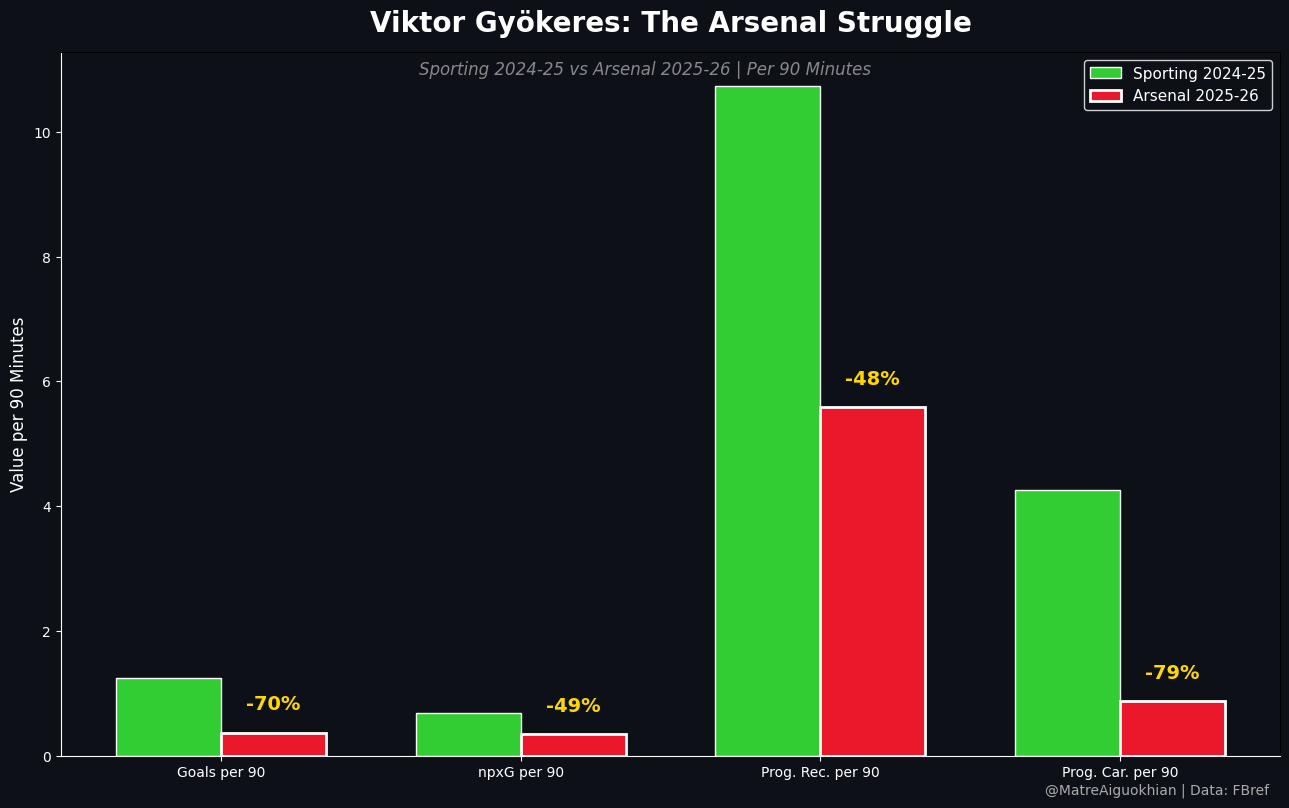

✅ Visual saved!


In [43]:
fig, ax = plt.subplots(figsize = (13,8))
fig.patch.set_facecolor('#0D1117')
ax.set_facecolor('#0D1117')

x_pos = np.arange(len(metrics))
width = 0.35     

# Sporting bars
bars1 = ax.bar(x_pos - width/2, sporting_vals, width,
               label='Sporting 2024-25',
               color='#32CD32', edgecolor='white', linewidth=1)

# Arsenal bars
bars2 = ax.bar(x_pos +width/2, arsenal_vals, width,
               label='Arsenal 2025-26',
               color='#EB172B', edgecolor='white', linewidth=2)

ax.set_xticks(x_pos)
ax.set_xticklabels(metrics, color='white', fontsize=10)
ax.tick_params(colors='white')


for i, (bar, pct) in enumerate(zip(bars2, pct_drops)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.3, pct,
            ha='center', va='bottom', color='#FFD700', 
            fontsize=14, fontweight='bold')

# Main title
ax.set_title('Viktor Gyökeres: The Arsenal Struggle', 
             color='white', fontsize=20, fontweight='bold', pad=15)
# Subtitle
fig.text(0.5, 0.90, 'Sporting 2024-25 vs Arsenal 2025-26 | Per 90 Minutes',
         ha='center', fontsize=12, color='#888888', style='italic')

ax.legend(loc='upper right', facecolor='#0D1117',
          edgecolor='white', labelcolor='white', fontsize=11)

# Y-axis label
ax.set_ylabel('Value per 90 Minutes', color='white', fontsize=12)

# Remove grid lines
ax.grid(False)

ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
plt.subplots_adjust(bottom=0.20)

fig.text(0.98, 0, '@MatreAiguokhian | Data: FBref',
         ha='right', fontsize=10, color='#AAAAAA')

plt.tight_layout()
plt.savefig('../visuals/gyokeres_arsenal_comparison.png',
            dpi=300, facecolor='#0D1117', bbox_inches='tight')
plt.show()

print("✅ Visual saved!")